In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading dataset
df = pd.read_csv("D:\\ishita\\college_py\\mtcars.csv")
df.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
# Checking the number of rows and columns  
num_rows, num_columns = df.shape  
print(f"Number of rows: {num_rows} (Total number of car models)\nNumber of columns: {num_columns} (Car model information columns)")

Number of rows: 32 (Total number of car models)
Number of columns: 12 (Car model information columns)


In [4]:
# Checking for missing values
df.isnull().sum()

name    0
mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [5]:
# Selecting relevant columns
columns = ['mpg', 'hp', 'am', 'gear']
df2 = df[columns]
df2.head()

,mpg,hp,am,gear
0,21.0,110,1,4
1,21.0,110,1,4
2,22.8,93,1,4
3,21.4,110,0,3
4,18.7,175,0,3


In [6]:
# Standardizing the column variables
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df2), columns=columns)

In [7]:
# Computing distance matrices
distance_metrics = {
    'euclidean': squareform(pdist(df_std, metric='euclidean')),
    'cityblock': squareform(pdist(df_std, metric='cityblock')),
    'minkowski_3': squareform(pdist(df_std, metric='minkowski', p=3)),
    'minkowski_4': squareform(pdist(df_std, metric='minkowski', p=4))
}

In [8]:
# Creating a combined minimum distance matrix by selecting the shortest pairwise distance across all metrics
combined_distances = np.min(np.stack(list(distance_metrics.values())), axis=0)

# Sorting distances for each model using the combined minimum distance metric
distance_df = pd.DataFrame(combined_distances, index=df.index, columns=df.index)
sorted_distances_list = []
for i in range(len(df)):
    model_distances = pd.DataFrame({'Model': df.index, 'Distance': distance_df.iloc[i].values})
    model_distances = model_distances.sort_values(by='Distance')
    sorted_distances_list.append(model_distances)
sorted_distances_matrix = np.array([model_distances['Distance'].values for model_distances in sorted_distances_list])

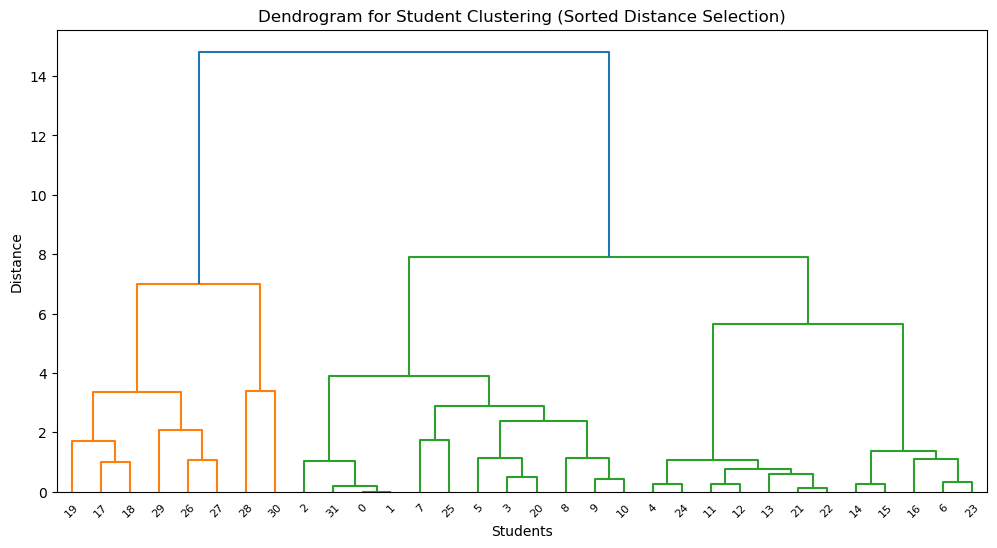

In [9]:
# Hierarchical Clustering using the sorted distances matrix
linkage_matrix = linkage(sorted_distances_matrix, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Student Clustering (Sorted Distance Selection)")
plt.xlabel("Students")
plt.ylabel("Distance")
plt.show()

In [10]:
# Assigning clusters
num_clusters = 3
df['class'] = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

In [11]:
# Labeling class as Mini, Prime, Sedan
class_labels = {1: 'Mini', 2: 'Prime', 3: 'Sedan'}
df['class'] = df['class'].map(class_labels)

In [12]:
# Displaying the number of car models in each class
class_counts = df['class'].value_counts()
print("Model count per class:\n", class_counts)

Model count per class:
 class
Prime    12
Sedan    12
Mini      8
Name: count, dtype: int64


In [13]:
# Creating separate DataFrames for each class
Mini = df[df['class'] == 'Mini']
Prime = df[df['class'] == 'Prime']
Sedan = df[df['class'] == 'Sedan']

In [14]:
# Mini
Mini.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,class
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,Mini
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,Mini
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,Mini
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2,Mini
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2,Mini


In [15]:
# Prime
Prime.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,class
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Prime
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Prime
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Prime
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Prime
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,Prime


In [16]:
# Sedan
Sedan.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,class
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.44,17.02,0,0,3,2,Sedan
6,Duster 360,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4,Sedan
11,Merc 450SE,16.4,8,275.8,180,3.07,4.07,17.40,0,0,3,3,Sedan
12,Merc 450SL,17.3,8,275.8,180,3.07,3.73,17.60,0,0,3,3,Sedan
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.78,18.00,0,0,3,3,Sedan
